In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats as ss
from collections import Counter
import math
from sklearn.feature_selection import mutual_info_classif
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
file=pd.read_csv("/content/online education.csv")

In [ ]:
file.head()

,gender,age,Institute,hours,IU,cost,Internet,platform,better,pcib,ocib,st,tc,syp,ccb,satisfied
0,1,22,3,6,0,700,3,3,1,0,0,2,0,0,0,1
1,0,23,3,3,0,700,1,3,1,0,0,2,3,2,0,1
2,0,24,3,3,0,500,3,3,1,0,1,2,4,0,0,1
3,0,22,3,6,0,600,5,3,1,0,0,7,1,0,1,1
4,0,24,3,3,0,500,3,3,1,1,1,3,3,0,0,1


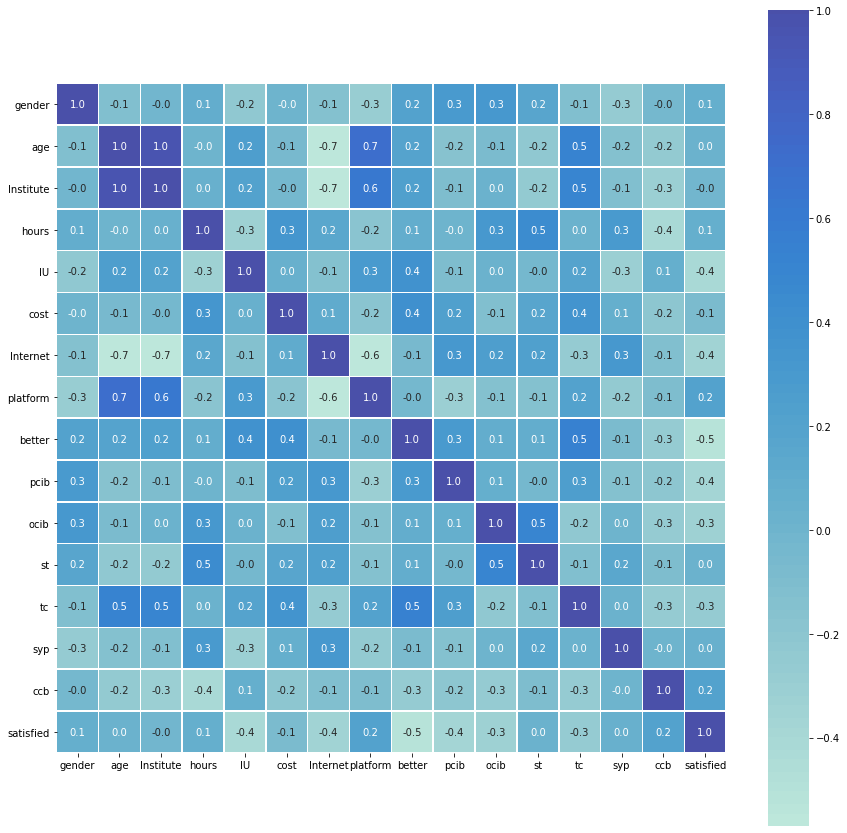

In [ ]:
a = file.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(a, vmax=1.0, center=2.10, robust=True, fmt='.1f', square=True, linewidth=.5, annot=True)
plt.savefig('correlation1.png')
plt.show()

In [ ]:
print(a)
threshold=0.5
b = abs(a["satisfied"])
result = b[b > 0.5]
print(result)

             gender       age  Institute  ...       syp       ccb  satisfied
gender     1.000000 -0.119582  -0.009276  ... -0.258098 -0.041949   0.075700
age       -0.119582  1.000000   0.961066  ... -0.150653 -0.240374   0.033063
Institute -0.009276  0.961066   1.000000  ... -0.119674 -0.295223  -0.011911
hours      0.087865 -0.000014   0.040107  ...  0.299044 -0.419503   0.056626
IU        -0.214703  0.247052   0.209586  ... -0.303275  0.068471  -0.407049
cost      -0.000673 -0.064426  -0.029821  ...  0.064837 -0.198842  -0.074091
Internet  -0.131613 -0.699305  -0.666971  ...  0.317669 -0.116976  -0.350999
platform  -0.276694  0.701140   0.633559  ... -0.237405 -0.094913   0.211488
better     0.206329  0.191666   0.244817  ... -0.073175 -0.257610  -0.519851
pcib       0.303171 -0.159767  -0.103079  ... -0.145243 -0.204101  -0.370484
ocib       0.310695 -0.079118   0.014344  ...  0.010165 -0.273044  -0.318363
st         0.162334 -0.227480  -0.236285  ...  0.159303 -0.098090   0.037286

In [ ]:
col = ['satisfied', 'gender', 'age', 'Institute', 'hours', 'IU', 'cost', 'Internet', 'platform', 'better', 'pcib', 'ocib', 'st', 'tc', 'syp', 'ccb']
file = file[col]

In [ ]:
trainfile = file
features = trainfile.columns

trainfile = trainfile.dropna()

In [ ]:
trainfile = pd.DataFrame(trainfile, columns=features)

In [ ]:
y = trainfile['satisfied']
X = trainfile.copy()
del X['satisfied']

In [ ]:
feature_name = list(X.columns)
num_feats=10

Information **Gain**

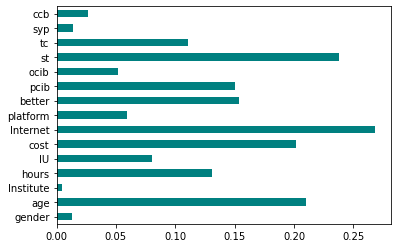

In [ ]:
importances = mutual_info_classif(X, y)
feat_importances = pd.Series(importances, X.columns[0:len(X.columns)])
feat_importances.plot(kind='barh', color="teal")
plt.show()

count    799.000000
mean      20.523154
std        4.428112
min       10.000000
25%       18.500000
50%       23.000000
75%       24.000000
max       27.000000
Name: age, dtype: float64


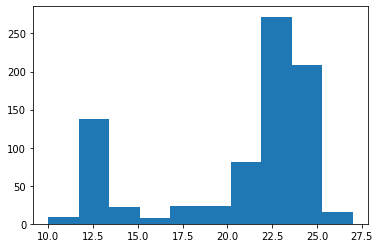

age          1.000000
Institute    0.961066
Internet     0.699305
platform     0.701140
tc           0.516459
Name: age, dtype: float64


In [ ]:
age = file['age'].describe()
print(age)
plt.hist(file["age"])
plt.show()

b = abs(a["age"])
result = b[b > 0.5]
print(result)

count    799.000000
mean       3.705882
std        1.184636
min        0.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        7.000000
Name: hours, dtype: float64


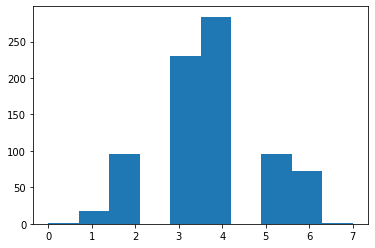

hours    1.0
Name: hours, dtype: float64


In [ ]:
hours = file['hours'].describe()
print(hours)
plt.hist(file["hours"])
plt.show()

b = abs(a["hours"])
result = b[b > 0.5]
print(result)

count    799.000000
mean       2.662078
std        0.496556
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        5.000000
Name: platform, dtype: float64


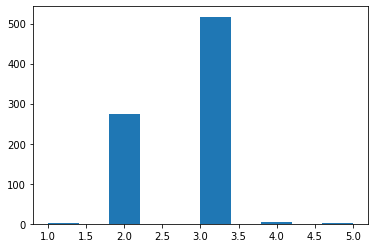

age          0.701140
Institute    0.633559
Internet     0.575132
platform     1.000000
Name: platform, dtype: float64


In [ ]:
platform = file['platform'].describe()
print(platform)
plt.hist(file["platform"])
plt.show()

b = abs(a["platform"])
result = b[b > 0.5]
print(result)

count    799.000000
mean       1.290363
std        0.454214
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: better, dtype: float64


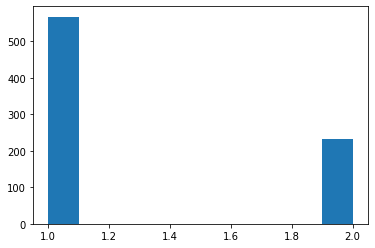

better       1.000000
tc           0.538880
satisfied    0.519851
Name: better, dtype: float64


In [ ]:
better = file['better'].describe()
print(better)
plt.hist(file["better"])
plt.show()

b = abs(a["better"])
result = b[b > 0.5]
print(result)

count    799.000000
mean       1.018773
std        1.093796
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: tc, dtype: float64


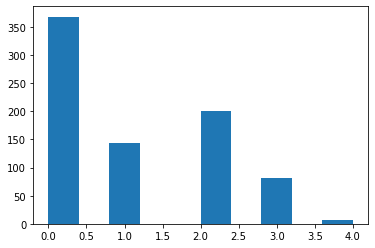

age       0.516459
better    0.538880
tc        1.000000
Name: tc, dtype: float64


In [ ]:
tc = file['tc'].describe()
print(tc)
plt.hist(file["tc"])
plt.show()

b = abs(a["tc"])
result = b[b > 0.5]
print(result)

count    799.000000
mean       4.836045
std        2.210003
min        0.000000
25%        3.000000
50%        4.000000
75%        6.000000
max       12.000000
Name: st, dtype: float64


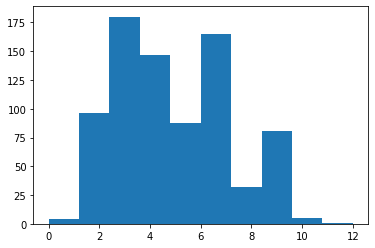

ocib    0.509267
st      1.000000
Name: st, dtype: float64


In [ ]:
st = file['st'].describe()
print(st)
plt.hist(file["st"])
plt.show()

b = abs(a["st"])
result = b[b > 0.5]
print(result)

Logistic regression

In [ ]:
feature_cols =['gender', 'age', 'Institute', 'hours', 'IU', 'cost', 'Internet', 'platform', 'better', 'pcib', 'ocib', 'st', 'tc', 'syp', 'ccb'] #['cost', 'platform', 'better', 'IU', 'syp']
X = file[feature_cols]
y = file['satisfied']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

acc=0
pre=0
re=0
f1=0
for i in range(0, 100):
  m1 = LogisticRegression()
  m1.fit(X_train,y_train)
  y_pred = m1.predict(X_test)
  accuracy = metrics.accuracy_score(y_test, y_pred)
  precision = metrics.precision_score(y_test, y_pred)
  recall = metrics.recall_score(y_test, y_pred)
  f1score = metrics.f1_score(y_test, y_pred)
  if accuracy>acc:
    acc=accuracy
  if precision>pre:
    pre=precision
  if recall>re:
    re=recall
  if f1score>f1:
    f1=f1score

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
print("Accuracy: %f" %acc)
print("Precision: %f" %pre )
print("Recall: %f" %re )
print("F1 Score: %f" %f1 )

Accuracy: 0.937500
Precision: 0.896104
Recall: 0.971831
F1 Score: 0.932432


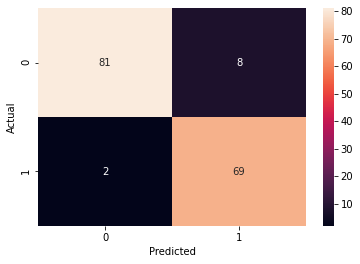

In [ ]:
c1 = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(c1, annot=True)
plt.show()

Naive Bayes Gaussian

In [ ]:
feature_cols =['gender', 'age', 'Institute', 'hours', 'IU', 'cost', 'Internet', 'platform', 'better', 'pcib', 'ocib', 'st', 'tc', 'syp', 'ccb'] #['cost', 'platform', 'better', 'IU', 'syp']
X = file[feature_cols]
y = file['satisfied']

In [ ]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB

acc=0
pre=0
re=0
f1=0
for i in range(0, 100):
  m4 = GaussianNB()
  m4.fit(X_train4,y_train4)
  y_pred4 = m4.predict(X_test4)
  accuracy = metrics.accuracy_score(y_test4, y_pred4)
  precision = metrics.precision_score(y_test4, y_pred4)
  recall = metrics.recall_score(y_test4, y_pred4)
  f1score = metrics.f1_score(y_test4, y_pred4)
  if accuracy>acc:
    acc=accuracy
  if precision>pre:
    pre=precision
  if recall>re:
    re=recall
  if f1score>f1:
    f1=f1score

In [ ]:
print("Accuracy: %f" %acc)
print("Precision: %f" %pre )
print("Recall: %f" %re )
print("F1 Score: %f" %f1 )

Accuracy: 0.850000
Precision: 0.797468
Recall: 0.887324
F1 Score: 0.840000


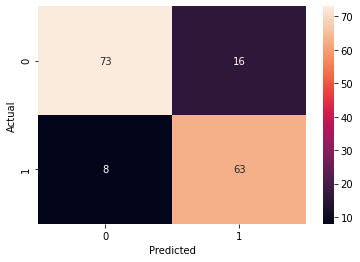

In [ ]:
c4 = pd.crosstab(y_test4, y_pred4, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(c4, annot=True)
plt.show()

**k-Nearest Neighbors**

In [ ]:
feature_cols =['gender', 'age', 'Institute', 'hours', 'IU', 'cost', 'Internet', 'platform', 'better', 'pcib', 'ocib', 'st', 'tc', 'syp', 'ccb'] #['cost', 'platform', 'better', 'IU', 'syp']
X = file[feature_cols]
y = file['satisfied']

In [ ]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

acc=0
pre=0
re=0
f1=0
for i in range(0, 100):
  m5 = KNeighborsClassifier(n_neighbors=5)
  m5.fit(X_train5,y_train5)
  y_pred5 = m5.predict(X_test5)
  accuracy = metrics.accuracy_score(y_test5, y_pred5)
  precision = metrics.precision_score(y_test5, y_pred5)
  recall = metrics.recall_score(y_test5, y_pred5)
  f1score = metrics.f1_score(y_test5, y_pred5)
  if accuracy>acc:
    acc=accuracy
  if precision>pre:
    pre=precision
  if recall>re:
    re=recall
  if f1score>f1:
    f1=f1score

In [ ]:
print("Accuracy: %f" %acc)
print("Precision: %f" %pre )
print("Recall: %f" %re )
print("F1 Score: %f" %f1 )

Accuracy: 0.918750
Precision: 0.926471
Recall: 0.887324
F1 Score: 0.906475


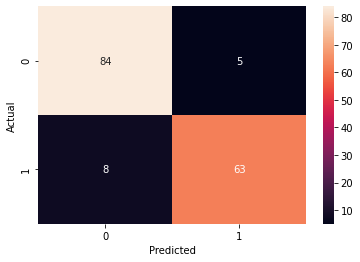

In [ ]:
c5 = pd.crosstab(y_test5, y_pred5, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(c5, annot=True)
plt.show()

SVN(Support Vector Machines)

In [ ]:
feature_cols =['gender', 'age', 'Institute', 'hours', 'IU', 'cost', 'Internet', 'platform', 'better', 'pcib', 'ocib', 'st', 'tc', 'syp', 'ccb'] #['cost', 'platform', 'better', 'IU', 'syp']
X = file[feature_cols]
y = file['satisfied']

In [ ]:
X_train7, X_test7, y_train7, y_test7 = train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train7, y_train7)

#Predict the response for test dataset
y_pred = clf.predict(X_test7)

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test7, y_pred)
cnf_matrix


array([[82,  7],
       [ 1, 70]])

Text(0.5, 257.44, 'Predicted label')

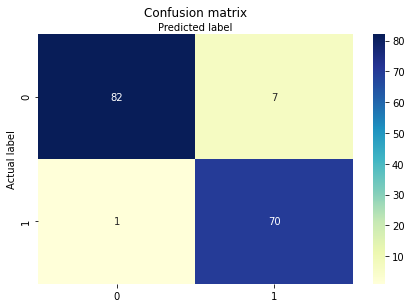

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test7, y_pred))
print("Precision:",metrics.precision_score(y_test7, y_pred))
print("Recall:",metrics.recall_score(y_test7, y_pred))
print("F1:",metrics.f1_score(y_test7, y_pred))

Accuracy: 0.95
Precision: 0.9090909090909091
Recall: 0.9859154929577465
F1: 0.9459459459459459


Decision Tree

In [ ]:
feature_cols =['gender', 'age', 'Institute', 'hours', 'IU', 'cost', 'Internet', 'platform', 'better', 'pcib', 'ocib', 'st', 'tc', 'syp', 'ccb'] #['cost', 'platform', 'better', 'IU', 'syp']
X = file[feature_cols]
y = file['satisfied']

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
acc=0
pre=0
re=0
f1=0
for i in range(0, 100):
  m3 = DecisionTreeClassifier(criterion="entropy", splitter="random", min_samples_split=50)
  m3.fit(X_train3,y_train3)
  y_pred3 = m3.predict(X_test3)
  accuracy = metrics.accuracy_score(y_test3, y_pred3)
  precision = metrics.precision_score(y_test3, y_pred3)
  recall = metrics.recall_score(y_test3, y_pred3)
  f1score = metrics.f1_score(y_test3, y_pred3)
  if accuracy>acc:
    acc=accuracy
  if precision>pre:
    pre=precision
  if recall>re:
    re=recall
  if f1score>f1:
    f1=f1score

In [ ]:
print("Accuracy: %f" %acc)
print("Precision: %f" %pre )
print("Recall: %f" %re )
print("F1 Score: %f" %f1 )

Accuracy: 0.968750
Precision: 0.984127
Recall: 1.000000
F1 Score: 0.965035


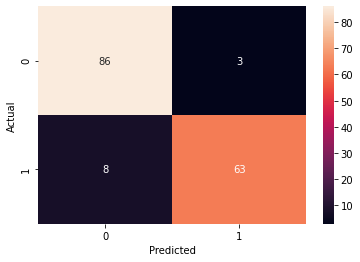

In [ ]:
c3 = pd.crosstab(y_test3, y_pred3, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(c3, annot=True)
plt.show()

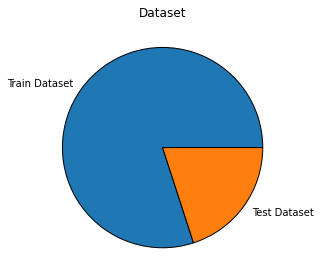

In [ ]:
slices = [80, 20]
labels = ['Train Dataset', 'Test Dataset']

plt.pie(slices, labels=labels, wedgeprops={'edgecolor':'black'})

plt.title('Dataset')
plt.tight_layout()
plt.show()

**Basic Description of the Data**(Data Analysis)

Describing The Data

In [ ]:
file.describe()

,gender,age,Institute,hours,IU,cost,Internet,platform,better,pcib,ocib,st,tc,syp,ccb,satisfied
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,0.292866,20.523154,2.511890,3.705882,0.297872,744.730914,5.546934,2.662078,1.290363,0.887359,1.245307,4.836045,1.018773,1.322904,0.316646,0.518148
std,0.455363,4.428112,0.825378,1.184636,0.457610,314.890117,5.394231,0.496556,0.454214,0.956355,0.917608,2.210003,1.093796,0.901607,0.465459,0.499984
min,0.000000,10.000000,1.000000,0.000000,0.000000,100.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.500000,2.000000,3.000000,0.000000,500.000000,2.000000,2.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,23.000000,3.000000,4.000000,0.000000,700.000000,3.000000,3.000000,1.000000,1.000000,2.000000,4.000000,1.000000,2.000000,0.000000,1.000000
75%,1.000000,24.000000,3.000000,4.000000,1.000000,1000.000000,8.000000,3.000000,2.000000,2.000000,2.000000,6.000000,2.000000,2.000000,1.000000,1.000000
max,1.000000,27.000000,3.000000,7.000000,1.000000,5000.000000,30.000000,5.000000,2.000000,12.000000,2.000000,12.000000,4.000000,2.000000,1.000000,1.000000


In [ ]:
first = file.head(5)
last = file.tail(5)

Sampling The Data

In [ ]:
file.sample(5)

,gender,age,Institute,hours,IU,cost,Internet,platform,better,pcib,ocib,st,tc,syp,ccb,satisfied
24,0,21,3,4,1,700,1,3,2,0,2,4,1,0,0,0
643,1,21,3,5,0,1000,6,2,2,2,2,5,2,2,0,0
493,0,13,1,4,0,1000,9,2,1,0,0,3,0,2,1,1
26,0,19,3,5,1,5000,2,3,1,1,2,4,0,0,0,1
754,0,24,3,6,0,850,2,3,1,0,2,9,1,2,0,1


In [ ]:
from random import sample

# Create a random index
randomIndex = np.array(sample(range(len(file)), 5))

# Get 5 random rows
fileSample = file.ocib[randomIndex]

# Print the sample
print(fileSample)

413    2
589    0
529    2
616    0
371    2
Name: ocib, dtype: int64


A Closer Look At Your Data: Queries

In [ ]:
# Petal length greater than sepal length?
file.query('pcib > better')

# Petal length equals sepal length?
file.query('pcib == satisfied')

,gender,age,Institute,hours,IU,cost,Internet,platform,better,pcib,ocib,st,tc,syp,ccb,satisfied
4,0,24,3,3,0,500,3,3,1,1,1,3,3,0,0,1
6,1,23,3,5,0,500,2,3,1,1,2,2,2,0,0,1
9,0,23,3,2,1,200,2,3,1,0,2,3,0,1,1,0
12,0,24,3,3,0,700,3,3,1,1,0,4,2,2,1,1
13,0,23,3,4,1,900,8,3,2,0,2,7,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,1,22,3,4,0,600,2,3,1,1,2,4,0,0,0,1
789,0,23,3,2,1,200,2,3,1,0,2,3,0,1,1,0
794,0,24,3,3,0,700,3,3,1,1,0,4,2,2,1,1
795,0,23,3,4,1,900,8,3,2,0,2,7,2,2,0,0


**The Challenges of Your Data**

Missing Values

In [ ]:
# Identifiy missing values
pd.isnull(file)

,gender,age,Institute,hours,IU,cost,Internet,platform,better,pcib,ocib,st,tc,syp,ccb,satisfied
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
795,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
796,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
797,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Interpolation function

In [ ]:
file.interpolate()


,gender,age,Institute,hours,IU,cost,Internet,platform,better,pcib,ocib,st,tc,syp,ccb,satisfied
0,1,22,3,6,0,700,3,3,1,0,0,2,0,0,0,1
1,0,23,3,3,0,700,1,3,1,0,0,2,3,2,0,1
2,0,24,3,3,0,500,3,3,1,0,1,2,4,0,0,1
3,0,22,3,6,0,600,5,3,1,0,0,7,1,0,1,1
4,0,24,3,3,0,500,3,3,1,1,1,3,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,0,24,3,3,0,700,3,3,1,1,0,4,2,2,1,1
795,0,23,3,4,1,900,8,3,2,0,2,7,2,2,0,0
796,0,24,3,3,1,1200,2,3,2,2,0,3,3,0,0,0
797,1,22,3,4,0,600,2,3,1,1,2,4,0,0,0,1


In [ ]:
# Import `PCA` from `sklearn.decomposition`
from sklearn.decomposition import PCA

# Build the model
pca = PCA(n_components=2)

# Reduce the data, output is ndarray
reduced_data = pca.fit_transform(file)

# Inspect shape of the `reduced_data`
reduced_data.shape

# print out the reduced data
print(reduced_data)

[[ -44.73912088   -3.11161406]
 [ -44.7437841    -5.46101775]
 [-244.73932313   -4.19233235]
 ...
 [ 455.25762381   -6.2571171 ]
 [-144.74081164   -3.43734334]
 [ 255.27802763    6.73147328]]


Correlation Identification With Pandas


In [ ]:
# Pearson correlation
file.corr()

# Kendall Tau correlation
file.corr('kendall')

# Spearman Rank correlation
file.corr('spearman')

,gender,age,Institute,hours,IU,cost,Internet,platform,better,pcib,ocib,st,tc,syp,ccb,satisfied
gender,1.000000,-0.355325,-0.045877,0.139491,-0.214703,0.006776,-0.010464,-0.280168,0.206329,0.320475,0.292079,0.216851,-0.127074,-0.246793,-0.041949,0.075700
age,-0.355325,1.000000,0.789439,-0.105218,0.260057,-0.036511,-0.514350,0.712898,0.073162,-0.185520,-0.220539,-0.240690,0.547238,-0.106477,-0.163210,0.080246
Institute,-0.045877,0.789439,1.000000,-0.001776,0.201485,-0.051966,-0.543341,0.641234,0.227282,-0.108113,0.021522,-0.262391,0.545434,-0.089207,-0.316456,-0.026073
hours,0.139491,-0.105218,-0.001776,1.000000,-0.325815,0.407312,0.285160,-0.260158,0.128663,0.073161,0.364342,0.453937,0.046741,0.325480,-0.421105,0.001912
IU,-0.214703,0.260057,0.201485,-0.325815,1.000000,0.044853,-0.087020,0.293166,0.379182,-0.111289,0.024173,-0.053864,0.163317,-0.335701,0.068471,-0.407049
cost,0.006776,-0.036511,-0.051966,0.407312,0.044853,1.000000,0.320908,-0.251799,0.486063,0.280427,-0.089693,0.233947,0.406528,0.180240,-0.153809,-0.153276
Internet,-0.010464,-0.514350,-0.543341,0.285160,-0.087020,0.320908,1.000000,-0.606586,0.116972,0.257020,0.203898,0.328608,-0.148519,0.293804,0.047835,-0.328200
platform,-0.280168,0.712898,0.641234,-0.260158,0.293166,-0.251799,-0.606586,1.000000,-0.045257,-0.339010,-0.127293,-0.192868,0.231332,-0.247630,-0.100686,0.216682
better,0.206329,0.073162,0.227282,0.128663,0.379182,0.486063,0.116972,-0.045257,1.000000,0.287505,0.081341,0.139654,0.531139,-0.060966,-0.257610,-0.519851
pcib,0.320475,-0.185520,-0.108113,0.073161,-0.111289,0.280427,0.257020,-0.339010,0.287505,1.000000,0.063559,0.058241,0.204637,-0.127529,-0.233515,-0.373861
